In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# loading the dataset
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


### Quick inspection & cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [46]:
df.columns.to_list()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 'Unnamed: 69']

### Histogram showing distribution of country populations for the most recent year

In [47]:
# Getting columns that are purely years
yrs_clmn = [i for i in df.columns if i.isdigit()]

# PickI the latest numeric year column present
latest_year = max(yrs_clmn, key=int)
print("Latest year column found:", latest_year)


Latest year column found: 2024


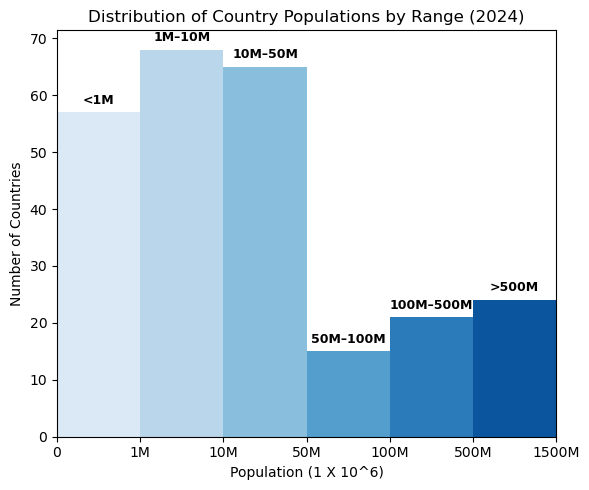

In [ ]:
# Extracting population data for the most recent year
pop_data = pd.to_numeric(df[latest_year], errors='coerce').dropna()

# Defining bins (population ranges) in absolute numbers
bins = [0, 1000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_500_000_000]
labels = ["<1M", "1M–10M", "10M–50M", "50M–100M", "100M–500M", ">500M"]

# Creating a new column with bin categories
pop_bins = pd.cut(pop_data, bins=bins, labels=labels, right=False)

# Counting countries per bin
bin_counts = pop_bins.value_counts().sort_index()


# Converting counts to plot-friendly format
bin_edges = bins  

plt.figure(figsize=(6,5))

# Plotting the bars
plt.bar(range(len(bin_counts)), bin_counts.values, width=1.0, 
        align='edge', color=sns.color_palette("Blues", len(bin_counts)))

# Setting x-ticks 
plt.xticks(
    range(len(bin_edges)), 
    [f"{int(x/1e6)}M" if x >= 1_000_000 else "0" for x in bin_edges]
)

# Labels & Title
plt.xlabel("Population (1 X 10^6)")
plt.ylabel("Number of Countries")
plt.title(f"Distribution of Country Populations by Range ({latest_year})")

# Annotating bars with descriptive labels
for i, (count, label) in enumerate(zip(bin_counts.values, labels)):
    plt.text(i + 0.5, count + 1, label, ha='center', va='bottom',
             fontsize=9, fontweight='bold')

# Adjusting x-axis limits to remove space on both ends
plt.xlim(0, len(bin_counts))

plt.tight_layout()
plt.show()

### Bar chart to show top 10 most populous countries for the most recent year

NameError: name 'FuncFormatter' is not defined

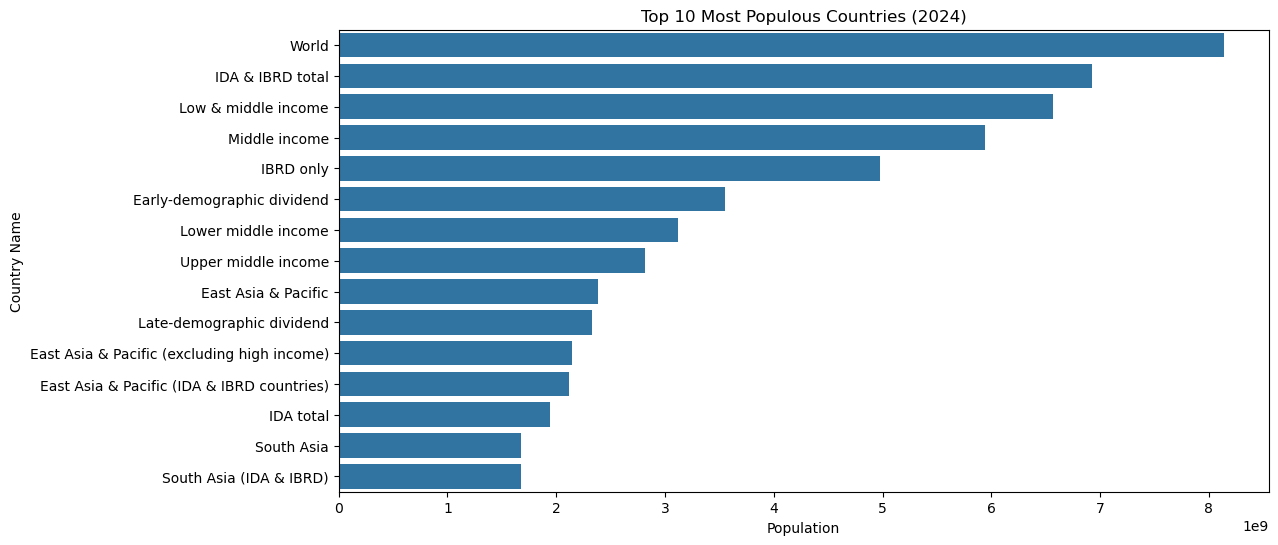

In [44]:
top15 = df[['Country Name', latest_year]].dropna().nlargest(15, latest_year)

plt.figure(figsize=(12,6))
sns.barplot(data=top15, x=latest_year, y='Country Name', orient='h')
plt.xlabel("Population")
plt.title(f"Top 10 Most Populous Countries ({latest_year})")

# format x-axis numbers with commas
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.savefig(f"top10_population_{latest_year}.png", dpi=300, bbox_inches='tight')
plt.show()
